# KNN Algorithm on Diabetes Dataset

<b>Load Dataset

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv(r'C:\Users\santhosh\Downloads\diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
data.describe().sum()

Pregnancies                  802.214630
Glucose                     1476.117149
BloodPressure               1192.461276
SkinThickness                958.488676
Insulin                     1966.793482
BMI                          970.876738
DiabetesPedigreeFunction     772.543705
Age                         1009.001117
Outcome                      770.825910
dtype: float64

<b>Data Clean

In [15]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
data.duplicated().sum()

0

In [19]:
data.Insulin.sum()

61286

In [21]:
data.Insulin

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

<b> Exploratory Data Analysis

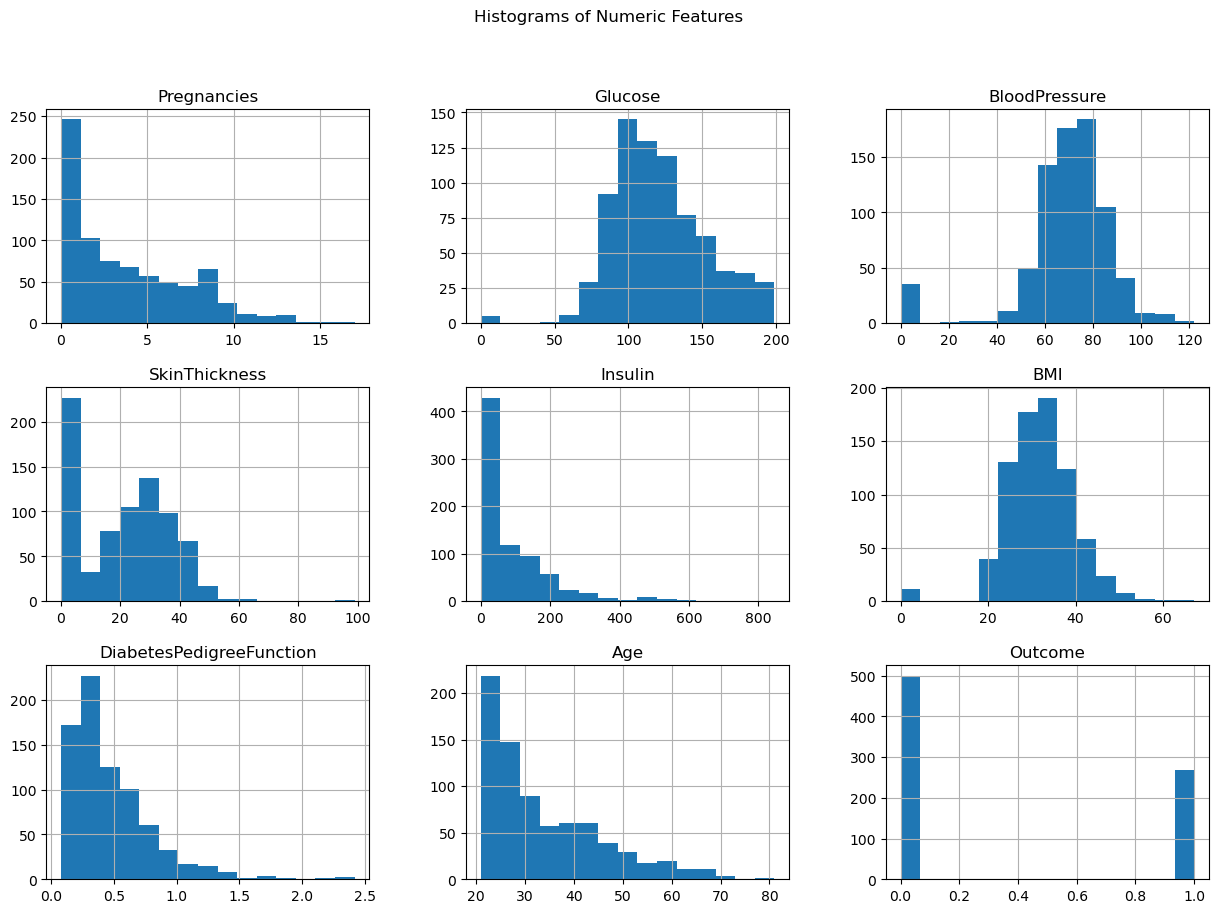

In [25]:
# Plot histograms for numeric features
data.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numeric Features')
plt.show()


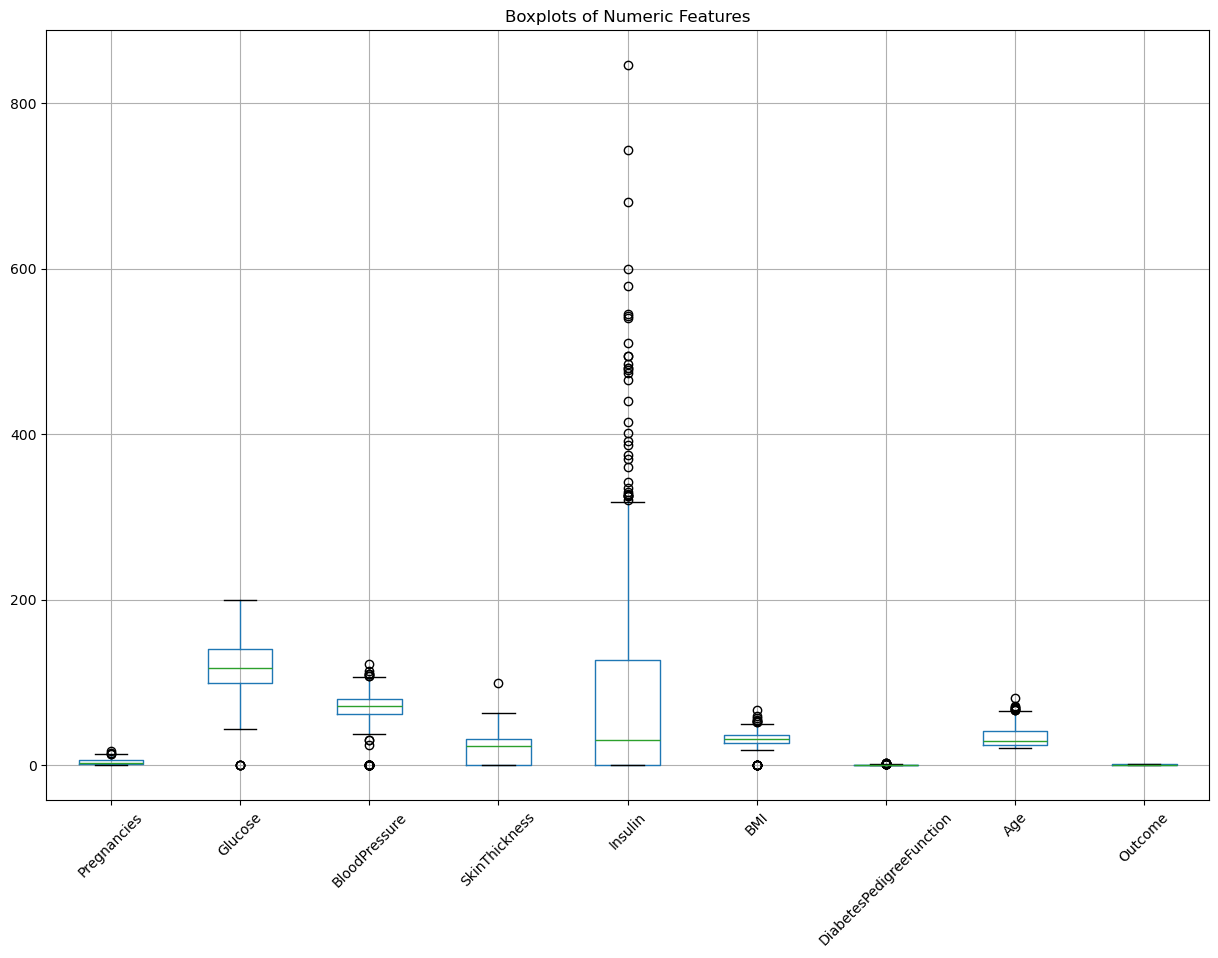

In [29]:
plt.figure(figsize=(15, 10))
data.boxplot()
plt.title('Boxplots of Numeric Features')
plt.xticks(rotation=45)
plt.show()


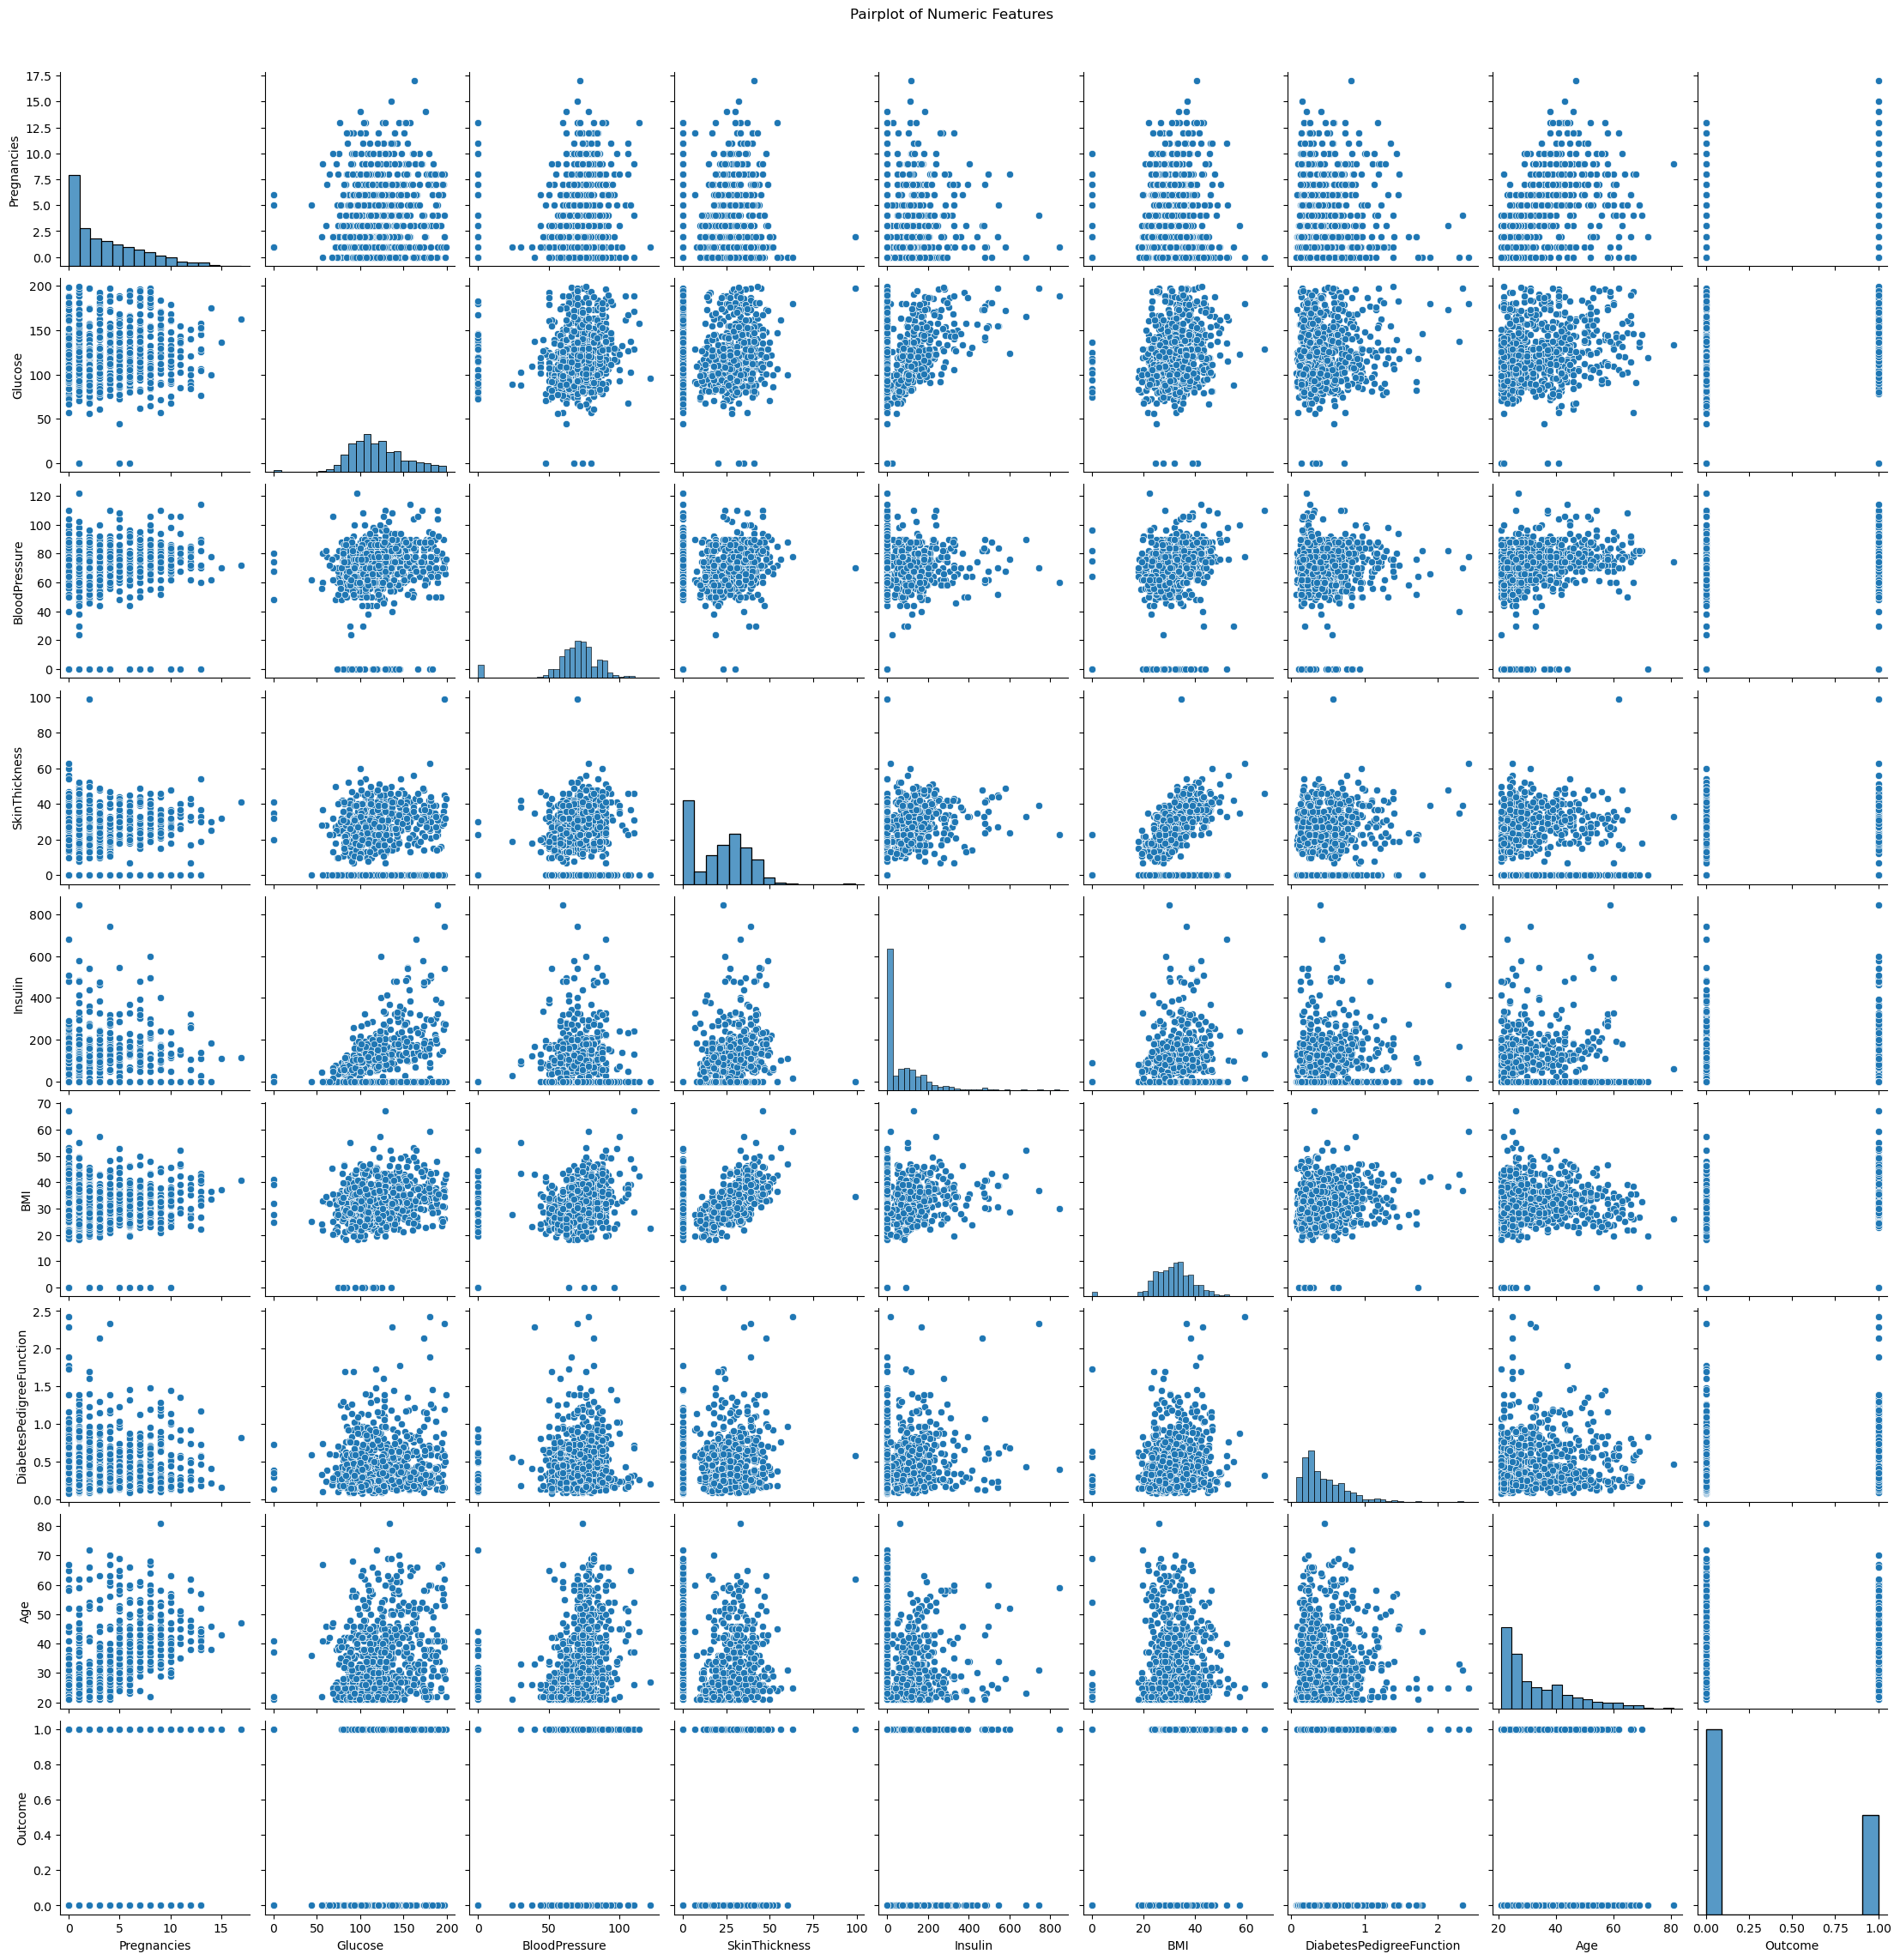

In [35]:
sns.pairplot(data)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()


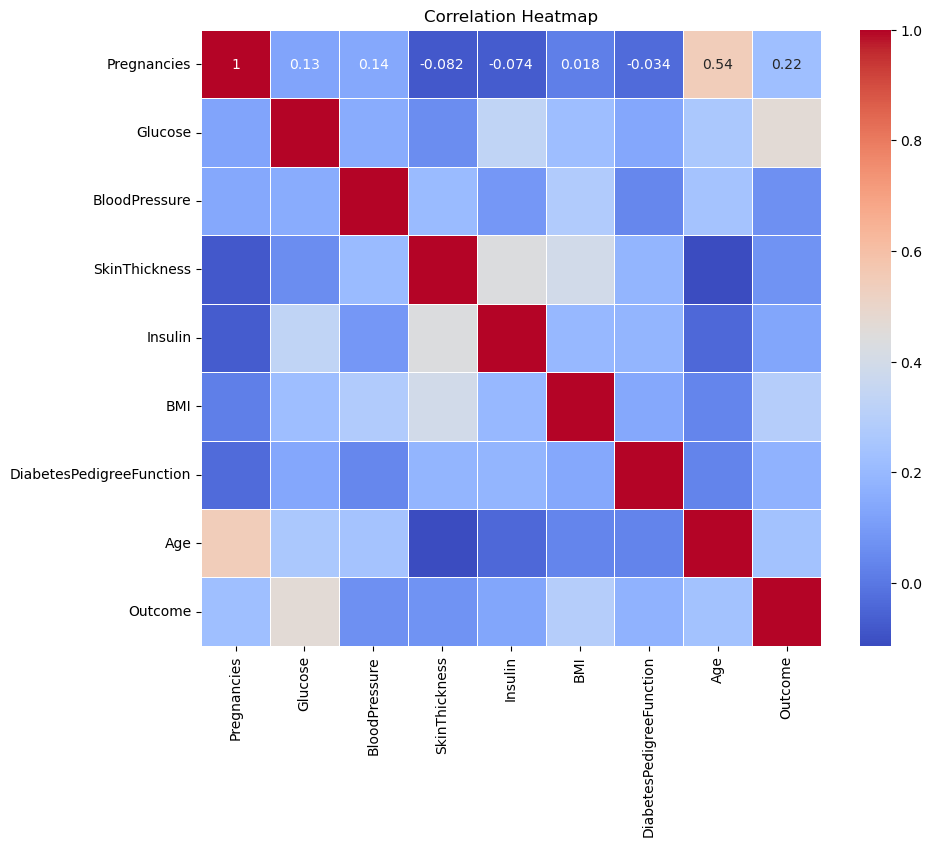

In [37]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<b> Train-Test Split

In [12]:
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]

xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=4)

In [13]:
sc = StandardScaler()

xtr = sc.fit_transform(xtr)
xte = sc.fit_transform(xte)

<b> Applying Algorithm

In [14]:
#Assign the knn library
#p=2 Power parameter for Eulidean
#p=1 Power parameter for man hanttan
clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

In [15]:
#predicting the values
clf.fit(xtr,ytr)

pred = clf.predict(xte)

In [16]:
#finding the confusion metrics
print(confusion_matrix(pred, yte))

[[88 25]
 [14 27]]


<b> Accuracy Value

In [17]:
#finding the accuracy 
print(accuracy_score(pred, yte))

0.7467532467532467
